# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

# Import CWUR data set

In [2]:
#Path 
path = r'C:\Users\ctede\OneDrive\Desktop\World University Rankings Analysis'
#Data set 
CWUR = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'CWUR_new_cols.pkl'))

In [3]:
CWUR.head()

,world_rank,university_name,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,region,Rank Category
0,1,Harvard University,United States,1,7,9,1,1,1,1,5,100.00,2012,North America,Top 50
1,2,Massachusetts Institute of Technology,United States,2,9,17,3,12,4,4,1,91.67,2012,North America,Top 50
2,3,Stanford University,United States,3,17,11,5,4,2,2,15,89.50,2012,North America,Top 50
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Europe,Top 50
4,5,California Institute of Technology,United States,4,2,29,7,37,22,22,18,85.21,2012,North America,Top 50


Will look at the world rank vs. quality of faculty variables for the regression analysis first. Then will look at the score and quality of faculty. The quality of faculty variable refers to the weighted number of faculty members of a university who have won awards, medals, and prizes. Based on the previous scatterplots, I think the higher the quality of faculty value is, the better ranked the university. 

# Cleaning and creating a subset dataframe

In [4]:
#Create a subset of variables of interest: world rank, publications, quality of faculty, score 
columns = ["world_rank", "publications", "quality_of_faculty", "score"]

In [5]:
CWUR_sub = CWUR[columns]

In [6]:
CWUR_sub.head()

,world_rank,publications,quality_of_faculty,score
0,1,1,1,100.00
1,2,12,3,91.67
2,3,4,5,89.50
3,4,16,4,86.17
4,5,37,7,85.21


In [7]:
#Check for missing values
CWUR_sub.isnull().sum()

world_rank            0
publications          0
quality_of_faculty    0
score                 0
dtype: int64

In [8]:
#Check for duplicates
dups = CWUR_sub.duplicated()
dups.shape

(2200,)

# Prepare data for regression analysis

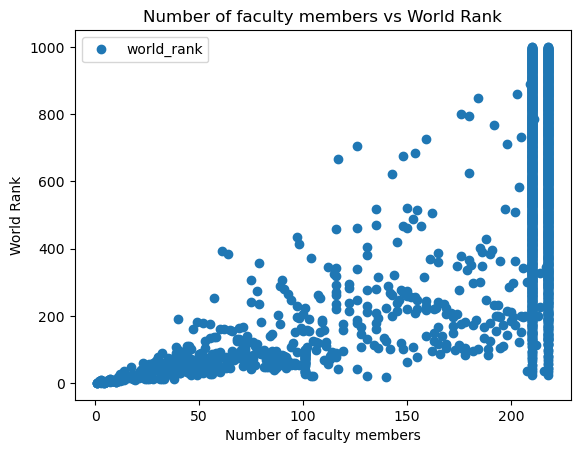

In [9]:
#Using matplotlib to create a scatterplot for the world rank and publications variables 
CWUR_sub.plot(x='quality_of_faculty', y='world_rank', style='o')
plt.title('Number of faculty members vs World Rank')
plt.xlabel('Number of faculty members')
plt.ylabel('World Rank')
plt.show()

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality_of_faculty', ylabel='Density'>

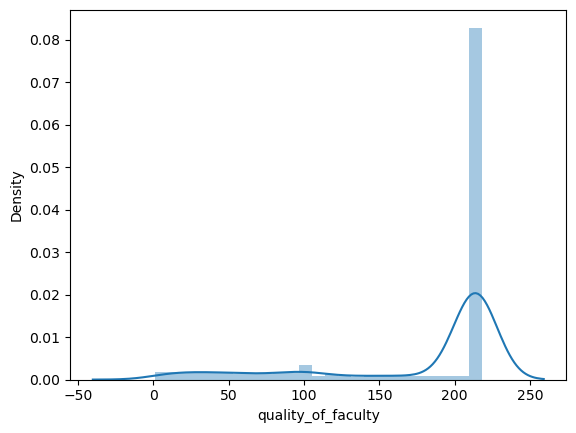

In [10]:
#check density plot
sns.distplot(CWUR_sub['quality_of_faculty'],bins=25)

Filter data for quality of faculty less than 200

In [11]:
df = CWUR_sub[CWUR_sub['quality_of_faculty'] <200]
df.shape

(598, 4)

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality_of_faculty', ylabel='Density'>

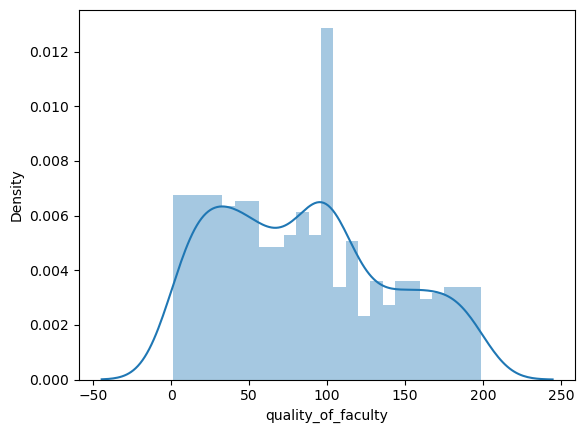

In [12]:
sns.distplot(df['quality_of_faculty'], bins=25)

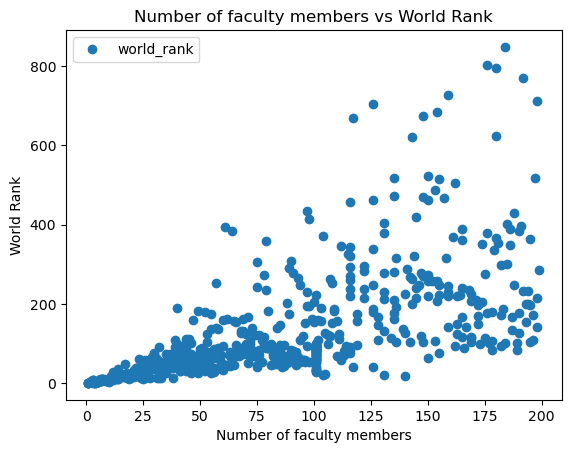

In [13]:
#Using matplotlib to create a scatterplot for the world rank and publications variables 
df.plot(x='quality_of_faculty', y='world_rank', style='o')
plt.title('Number of faculty members vs World Rank')
plt.xlabel('Number of faculty members')
plt.ylabel('World Rank')
plt.show()

In [14]:
#Reshape the variables into NumPy arrays and place them into separate objects 
#X = independent 
X = df['quality_of_faculty'].values.reshape(-1,1)

#y = dependent 
y = df['world_rank'].values.reshape(-1,1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [16]:
#Create a regression object 
regression = LinearRegression()

In [17]:
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
y_predicted = regression.predict(X_test)

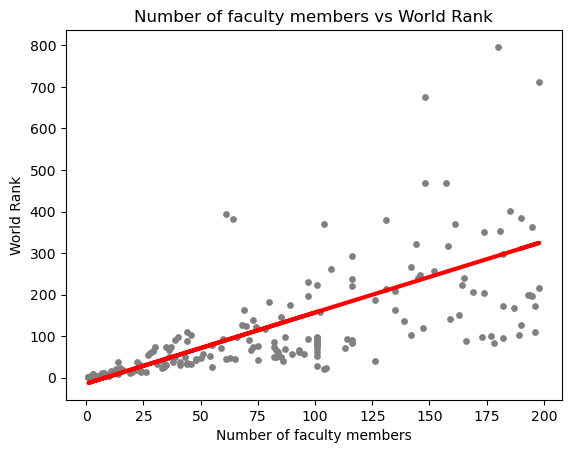

In [19]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of faculty members vs World Rank')
plot_test.ylabel('World Rank')
plot_test.xlabel('Number of faculty members')
plot_test.show()

In [20]:
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [21]:
#Print the model performance statistics 
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[1.71122284]]
Mean squared error 10261.324358418737
R2 score 0.40245794387720923


Re-do this with the original CWUR_sub dataframe (includes all quality of faculty variables)

In [22]:
#Reshape the variables into NumPy arrays and place them into separate objects 
#X = independent 
X = CWUR_sub['quality_of_faculty'].values.reshape(-1,1)

#y = dependent 
y = CWUR_sub['world_rank'].values.reshape(-1,1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [24]:
#Create a regression object 
regression = LinearRegression()

In [25]:
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
y_predicted = regression.predict(X_test)

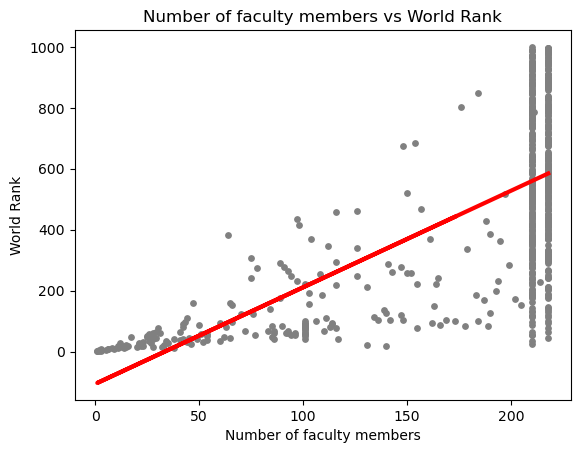

In [27]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of faculty members vs World Rank')
plot_test.ylabel('World Rank')
plot_test.xlabel('Number of faculty members')
plot_test.show()

In [28]:
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [29]:
#Print the model summary stats
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[3.168811]]
Mean squared error 52327.22411199308
R2 score 0.43347047474009903


### Use the score and quality of faculty variables (instead of world rank)

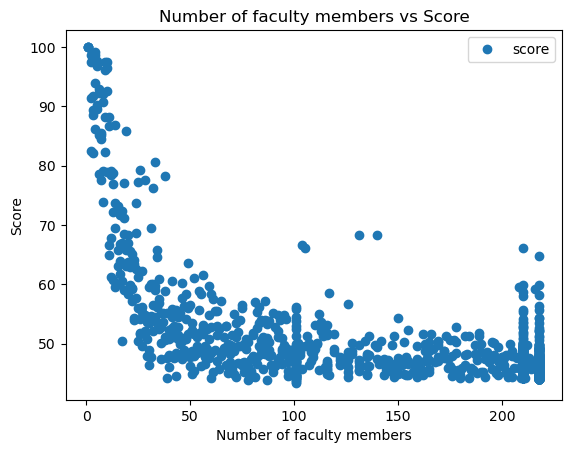

In [30]:
#Using matplotlib to create a scatterplot for the world rank and publications variables 
CWUR_sub.plot(x='quality_of_faculty', y='score', style='o')
plt.title('Number of faculty members vs Score')
plt.xlabel('Number of faculty members')
plt.ylabel('Score')
plt.show()

In [31]:
#Reshape the variables into NumPy arrays and place them into separate objects 
#X = independent 
X = CWUR_sub['quality_of_faculty'].values.reshape(-1,1)

#y = dependent 
y = CWUR_sub['score'].values.reshape(-1,1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [33]:
#Create a regression object 
regression = LinearRegression()

In [34]:
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
y_predicted = regression.predict(X_test)

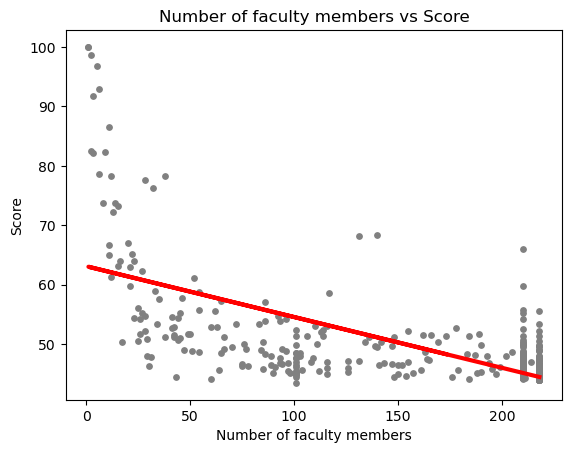

In [36]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of faculty members vs Score')
plot_test.ylabel('Score')
plot_test.xlabel('Number of faculty members')
plot_test.show()

In [37]:
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [38]:
#Print the model performance statistics 
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[-0.08543277]]
Mean squared error 30.20121668480323
R2 score 0.46998911298163204


In contrast to the world rank and the quality of faculty variables, the score has a negative linear relationship with the quality of faculty variable. 

Slope = -0.085
- This indicates the negative relationship 
- As the number of faculty members (with awards, medals, or prizes) increases, the score for that university will decrease.

MSE = 30.20
- The range of values for the score are btwn 43 and 100, and the range of values for the quality of faculty are btwn 1 and 218. 
- An MSE of 30 is moderate (not very high when looking at the range for the quality of faculty values). 

R2 = 0.47 or 47% 
- This is also a moderate statistic (about halfway btwn 0 and 1)
- About 47% of the variance for the score values can be explained by the number of faculty members. 

Overall, the regression line is not an accurate representation of the relationship between the score and the quality of faculty members. 

Hypothesis: the quality of faculty has an opposite affect on the score --> instead of a positive relationship, there is a negative relationship btwn the score and quality of faculty. 

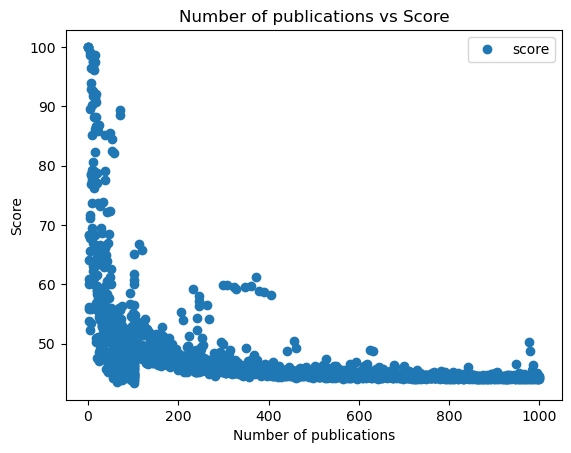

In [39]:
#Using matplotlib to create a scatterplot for the score and publications variables 
CWUR_sub.plot(x='publications', y='score', style='o')
plt.title('Number of publications vs Score')
plt.xlabel('Number of publications')
plt.ylabel('Score')
plt.show()

In [40]:
#Reshape the variables into NumPy arrays and place them into separate objects 
#X = independent 
X = CWUR_sub['publications'].values.reshape(-1,1)

#y = dependent 
y = CWUR_sub['score'].values.reshape(-1,1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [42]:
#Create a regression object 
regression = LinearRegression()

In [43]:
regression.fit(X_train, y_train)

LinearRegression()

In [44]:
y_predicted = regression.predict(X_test)

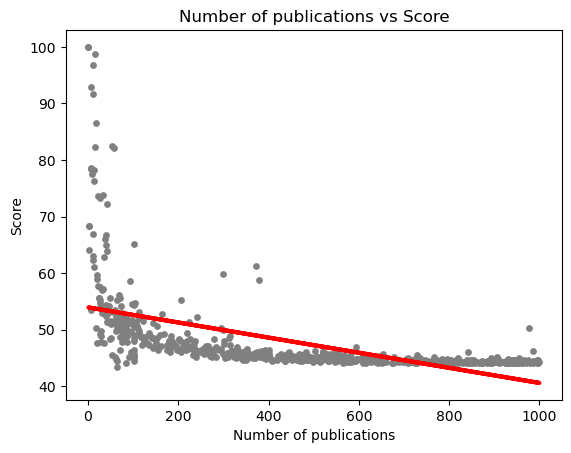

In [45]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of publications vs Score')
plot_test.ylabel('Score')
plot_test.xlabel('Number of publications')
plot_test.show()

In [46]:
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [47]:
#Print the model performance statistics 
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[-0.01335967]]
Mean squared error 40.56264925872604
R2 score 0.2881529927153529


Alternate way to plot a regression line

<AxesSubplot:xlabel='publications', ylabel='score'>

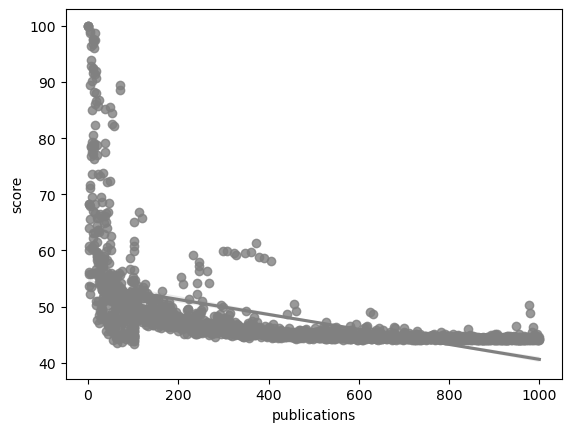

In [50]:
sns.regplot(x='publications', y='score', data = CWUR_sub, color = 'gray')